********************************************************************************************************************************
# LAB 09 - PCA & LDA
<hr/>

By: **Virendra Singh** <br>
Linkedin: https://www.linkedin.com/in/singhviren7/
<hr/>


## Lab Overview  
### Objectives

- Part A. Perform PCA and LDA on Breast Cancer Dataset, write down your obsevations. While loading, use the toy dataset available in SKLearn (load_breast_cancer)
- Part B. Illustrate the effect of changing various method parameters of PCA and LDA. Compare the accuracies, and provide visualizations and interpretations for the evaluation metrices.
- Part C. "PCA could be used in applications such as Image Processing, to reduce the complexity of data and improve performance or to compress images". Justify this statement with your own findings.


### Problem Definition
- We have to explore on the pca and lda & different features of it. 
- Data analysis EDA to be done with various visulization and dealing with odd features.
- Chacking the effect of changing various method parameters of PCA and LDA. 
- Comparing the accuracies, and provide visualizations and interpretations for the evaluation metrices.

### Approach
`Data exploration is the first step of data analysis used to explore and visualize data to uncover insights from the start or identify areas or patterns to dig into more.`
- First load the data and explore it's various features and parameters.
- In EDA part using visulization various plota are drawn and different inshights are gathered.
- Preaper the data for modling. Using Descision Trees we will predict the values and find out the different parameters.
- Applying the model before and after applying pca and lda.
- Compare different values and explote the parameters of Descision Trees.

## CODE:

In [1]:
# Importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

<hr>

## Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

     a) radius (mean of distances from center to points on the perimeter)
     b) texture (standard deviation of gray-scale values)
     c) perimeter
     d) area
     e) smoothness (local variation in radius lengths)
     f) compactness (perimeter^2 / area - 1.0)
     g) concavity (severity of concave portions of the contour)
     h) concave points (number of concave portions of the contour)
     i) symmetry
     j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

<hr>


##  Importing the dataset:

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data = data['data'], columns=data['feature_names'])
y = data.target

In [3]:
df=X.copy()
df["target"] = y

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Checking the length & dimensions of our dataframe, we can use len() method & “.shape”.

In [5]:
print ("Dataset Lenght:: ", len(df))
print ("Dataset Shape:: ", df.shape)

Dataset Lenght::  569
Dataset Shape::  (569, 31)


### Checking the Statistical description of our dataset.

In [6]:
df.describe(include='all')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<hr>

## EDA

In [8]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

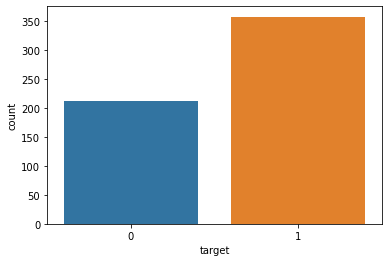

In [9]:
sns.countplot(df['target'])
plt.show()

##  Heatmap

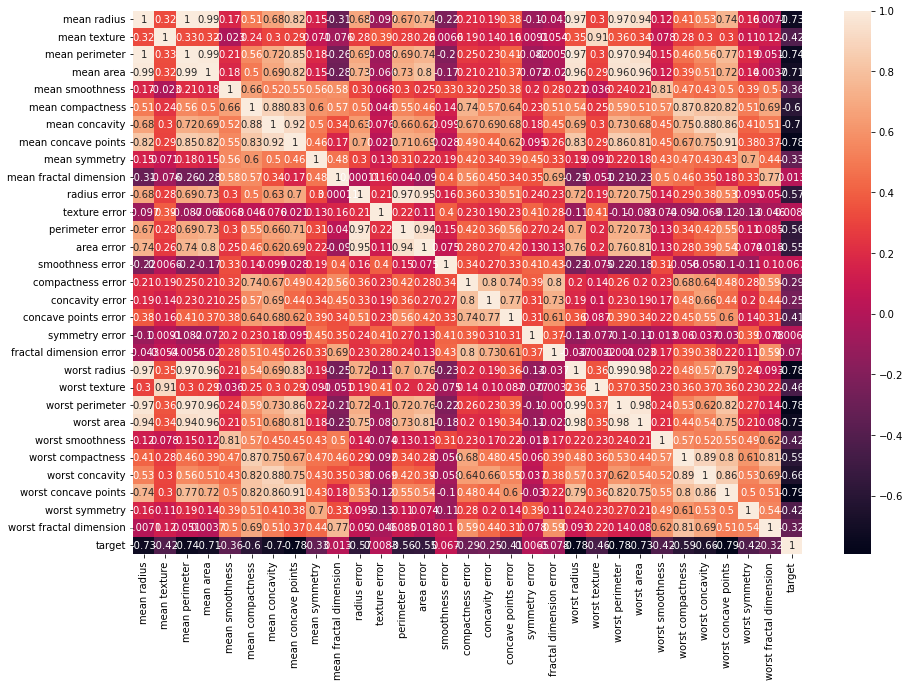

In [10]:
#Heatmap
num_feat = df.select_dtypes(include=np.number).columns
plt.figure(figsize= (15, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [11]:
dfh = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']]

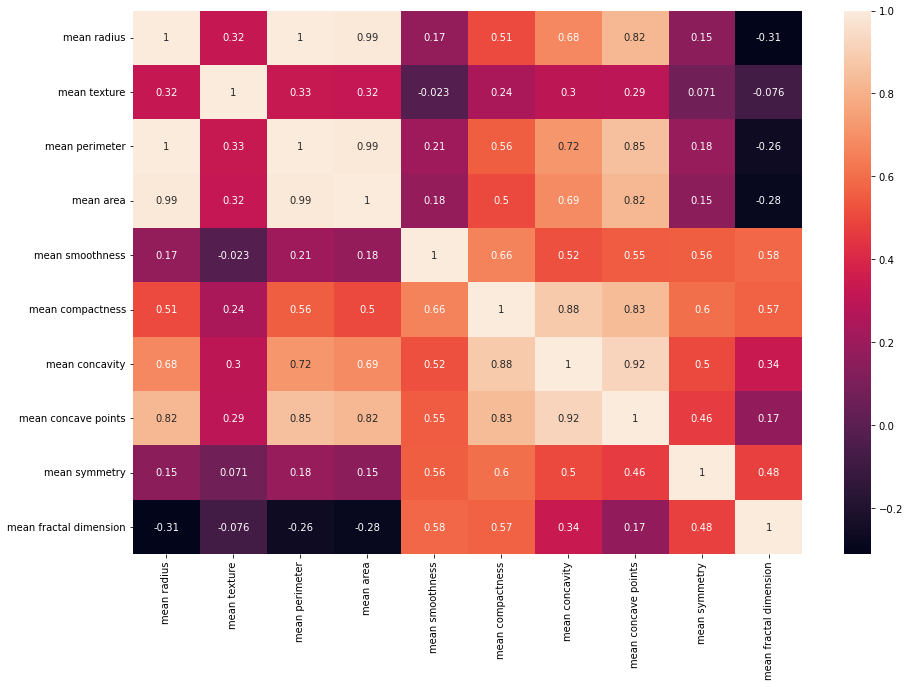

In [12]:
#Heatmap
num_feat = dfh.select_dtypes(include=np.number).columns
plt.figure(figsize= (15, 10))
sns.heatmap(dfh.corr(), annot = True)
plt.show()

We can observe the corelations among various features.

<hr>

### PCA

In [13]:
scaler = StandardScaler().fit(X)
X_standardised = scaler.transform(X)

In [14]:
X_standardised

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

PCA with 3 variable.

In [15]:
principal_component_analysis = PCA(n_components = 3)
results = principal_component_analysis.fit(X_standardised)
results_transformed = results.transform(X_standardised)

<IPython.core.display.Javascript object>

In [16]:
pca_df = pd.DataFrame(data = results_transformed)

In [17]:
pca_df.head()

,0,1,2
0,9.192837,1.948583,-1.123166
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232790
4,3.935302,-1.948072,1.389767


<hr>

### Applying ML Algoritm to check the accuracy before and after applying PCA

### Applying Decision Tree Model:
## Without PCA

- X contains all of the features

- y contains the target

In [18]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


### Train Test Split:
    
- Splitting the data in training set which our model will be trained on, and testing set that our model will be tested on by making predictions.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_standardised, y, test_size=0.20, random_state=123)

# Importing:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

# Decision Tree Model
model_normal = dt.fit(X_train, y_train)
pred_normal = model_normal.predict(X_test)
ac_normal = round(accuracy_score(y_test, pred_normal)*100, 2)

print("Accuracy Score:",ac_normal)
print('Classification Report:')
print(classification_report(y_test, pred_normal))

Accuracy Score: 95.61
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.96      0.97      0.97        73

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## With PCA


- pca_df contains all of the pca component

- y contains the target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.20, random_state=123)

# Importing:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

# Decision Tree Model
model_pca = dt.fit(X_train, y_train)
pred_pca = model_pca.predict(X_test)
ac_pca = round(accuracy_score(y_test, pred_pca)*100, 2)

print("Accuracy Score:",ac_pca)
print('Classification Report:')
print(classification_report(y_test, pred_pca))

Accuracy Score: 96.49
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        41
           1       0.96      0.99      0.97        73

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## LDA

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(solver='svd', n_components = 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_standardised, y, test_size=0.20)


X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Decision Tree Model
model_lda = dt.fit(X_train, y_train)
pred_lda = model_lda.predict(X_test)
ac_lda = round(accuracy_score(y_test, pred_lda)*100, 2)


print("Accuracy Score:",ac_lda)
print('Classification Report:')
print(classification_report(y_test, pred_lda))

Accuracy Score: 96.49
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.96      0.99      0.97        78

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



<hr>

## Part:B

### Plotting the PCA Components:

<IPython.core.display.Javascript object>

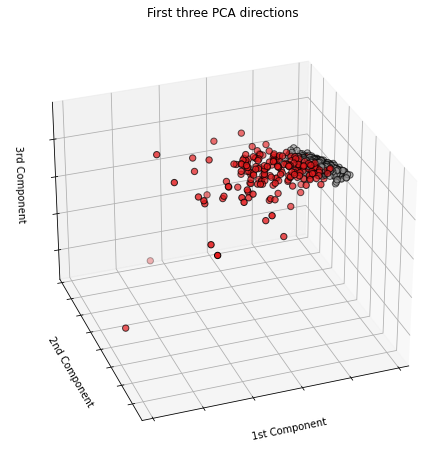

In [23]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)


X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st Component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd Component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd Component")
ax.w_zaxis.set_ticklabels([])

plt.show()

<hr>

### Checking The Accuracy Score at differen components:

In [24]:
# Checking The Accuracy Score at differen components:
summary = pd.DataFrame()
component=[1,2,3,4,5]
for c in component:
    pca = PCA(n_components = c)
    X_train, X_test, y_train, y_test = train_test_split(X_standardised, y, test_size=0.20, random_state=123)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    m_pred=model.predict(X_test)
    acs = accuracy_score(y_test, m_pred)
    s1={"n_components": c,
        "Accuracy Score":acs}
    summary=summary.append(s1, ignore_index=True)
print("Comparing thr Accuracy Acore for different n_components in PCA:")
display(summary)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Comparing thr Accuracy Acore for different n_components in PCA:


,n_components,Accuracy Score
0,1.0,0.842105
1,2.0,0.938596
2,3.0,0.964912
3,4.0,0.964912
4,5.0,0.964912


<hr>

### Comaring Accuracy Scores:

In [25]:
print("*" *24)
print("FINAL REPORT")
print("-" *24)
print("Accuracy Score:")
print("-" *24)
print("Normal Dataset:")
print("The accuracy is : {}".format(ac_normal))
print("-" *24)
print("After applying PCA:")
print("The accuracy is : {}".format(ac_pca))
print("-" *24)
print("After applying LDA:")
print("The accuracy is : {}".format(ac_lda))
print("*" *24)

************************
FINAL REPORT
------------------------
Accuracy Score:
------------------------
Normal Dataset:
The accuracy is : 95.61
------------------------
After applying PCA:
The accuracy is : 96.49
------------------------
After applying LDA:
The accuracy is : 96.49
************************


In [28]:
from sklearn.metrics import f1_score

In [29]:
f1_score(y_test, pred_normal)

0.9659863945578231

<hr>

### Comaring Confusion Matrix:

In [26]:
cm_normal = confusion_matrix(y_test, pred_normal)
cm_pca = confusion_matrix(y_test, pred_pca)
cm_lda = confusion_matrix(y_test, pred_lda)


print("*" *20)
print("Confusion Matrix")
print("-" *20)
print("Normal Dataset:")
print(cm_normal)
print("-" *20)
print("After applying PCA:")
print(cm_pca)
print("-" *20)
print("After applying LDA:")
print(cm_lda)
print("*" *20)

********************
Confusion Matrix
--------------------
Normal Dataset:
[[38  3]
 [ 2 71]]
--------------------
After applying PCA:
[[38  3]
 [ 1 72]]
--------------------
After applying LDA:
[[12 29]
 [22 51]]
********************


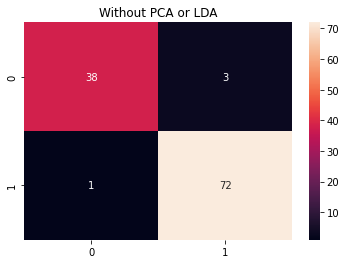

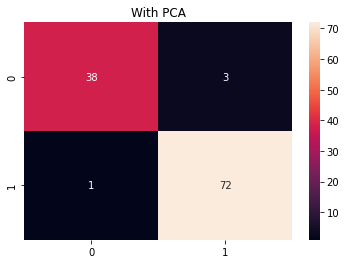

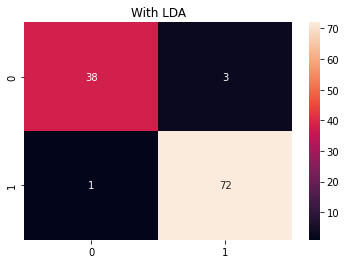

In [27]:
plt.title("Without PCA or LDA")
sns.heatmap(cm_pca, annot=True)
plt.show()
plt.title("With PCA")
sns.heatmap(cm_pca, annot=True)
plt.show()
plt.title("With LDA")
sns.heatmap(cm_pca, annot=True)
plt.show()

<hr>

## Part:C

`PCA could be used in applications such as Image Processing, to reduce the complexity of data and improve performance or to compress images`
- One of the use cases of PCA is that it can be used for image compression — a technique that minimizes the size in bytes of an image while keeping as much of the quality of the image as possible.
- Image compression with principal component analysis is a frequently occurring application of the dimension reduction technique. Recall from a previous post that employed singular value decomposition to compress an image, that an image is a matrix of pixels represented by RGB color values. Thus, principal component analysis can be used to reduce the dimensions of the matrix (image) and project those new dimensions to reform the image that retains its qualities but is smaller in k-weight. 
- We can use PCA to compress the image of a cute kitty cat. As the number of principal components used to project the new data increases, the quality and representation compared to the original image improve.

###  Pros and Cons of PCA :-
#### Pros :-
- Dimensionality Reduction can help learning
- Remove Noise
- Can deal with large datasets

#### Cons :-
- hard to interpret
- sample dependent
- linear

<hr>

## References:
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- https://towardsdatascience.com/principal-component-analysis-for-breast-cancer-data-with-r-and-python-b312d28e911f
- https://www.kaggle.com/jahirmorenoa/pca-to-the-breast-cancer-data-set
- http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
- https://www.mygreatlearning.com/blog/linear-discriminant-analysis-or-lda/

## Conclusion/Results:
This assignment given us the clear idea about the PCA, LDA, DataFrame, Visulization, ML/Analysis, libraries, datasets and various subparts of sklearn libraries, it's uses and various method to find out the hidden patterns in data and relationa between various features and data stractures. We explored the different fields of PCA and LDA, it's parameters and various parameters.
*******************************************************************************************************************************